<a href="https://colab.research.google.com/github/KaanErdogdu/Bootcamp_5_SQL/blob/master/Odev_4_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
import warnings
warnings.filterwarnings('ignore')
#pd.options.display.float_format = '{:.2f}'.format
sns.set(style="whitegrid")

plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = (8,5.5)

In [0]:
education_df = pd.read_csv('states_all.csv')

fill_list = ["ENROLL", "TOTAL_REVENUE", "FEDERAL_REVENUE",
             "STATE_REVENUE", "LOCAL_REVENUE", "TOTAL_EXPENDITURE",
             "INSTRUCTION_EXPENDITURE", "SUPPORT_SERVICES_EXPENDITURE",
             "OTHER_EXPENDITURE", "CAPITAL_OUTLAY_EXPENDITURE", "GRADES_PK_G",
             "GRADES_KG_G", "GRADES_4_G", "GRADES_8_G", "GRADES_12_G", "GRADES_1_8_G",
             "GRADES_9_12_G", "GRADES_ALL_G"]

states = education_df["STATE"].unique()

for state in states:
    education_df.loc[education_df["STATE"] == state, fill_list] = education_df.loc[education_df["STATE"] == state, fill_list].interpolate()

education_df.dropna(inplace=True)

In [118]:
education_df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
561,2003_ALABAMA,ALABAMA,2003,727900.0,5196054.0,567704.0,2966981.0,1661369.0,5298932.0,2817111.0,1521462.0,424662.0,432279.0,1852.0,56541.0,57323.0,59663.0,42005.0,466920.0,205907.0,731220.0,223.0,262.0,207.0,253.0
562,2003_ALASKA,ALASKA,2003,133303.0,1425948.0,259423.0,813371.0,353154.0,1610289.0,763525.0,514052.0,55715.0,247005.0,1883.0,9475.0,10115.0,11140.0,8651.0,82337.0,40238.0,133933.0,233.0,279.0,212.0,256.0
563,2003_ARIZONA,ARIZONA,2003,875111.0,6529894.0,740579.0,2912629.0,2876686.0,6210287.0,2810907.0,1964229.0,303924.0,864642.0,9376.0,76365.0,76207.0,76376.0,68815.0,613442.0,307272.0,1012068.0,229.0,271.0,209.0,255.0
564,2003_ARKANSAS,ARKANSAS,2003,450158.0,3241275.0,379947.0,2394336.0,466992.0,3242799.0,1768713.0,972598.0,170767.0,247245.0,2573.0,36391.0,34070.0,37004.0,28840.0,281834.0,132712.0,454523.0,229.0,266.0,214.0,258.0
565,2003_CALIFORNIA,CALIFORNIA,2003,6226552.0,59815855.0,5795655.0,33617766.0,20402434.0,59749885.0,29561563.0,17030335.0,2995767.0,7341541.0,114939.0,456941.0,493415.0,500143.0,395194.0,3929869.0,1854518.0,6413867.0,227.0,267.0,206.0,251.0


In [119]:
education_df.describe()

,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,459.000000,4.590000e+02,4.590000e+02,4.590000e+02,4.590000e+02,4.590000e+02,4.590000e+02,4.590000e+02,4.590000e+02,4.590000e+02,4.590000e+02,459.000000,459.000000,459.000000,459.000000,459.000000,4.590000e+02,4.590000e+02,4.590000e+02,459.000000,459.000000,459.000000,459.000000
mean,2011.000000,9.467396e+05,1.164788e+07,1.030888e+06,5.369013e+06,5.247976e+06,1.171086e+07,6.087891e+06,3.436709e+06,5.214367e+05,1.095152e+06,24492.739288,72051.431373,72794.749455,73348.882353,67017.596950,5.838316e+05,2.909741e+05,9.750967e+05,239.039216,281.078431,220.004357,263.651416
std,5.169612,1.119865e+06,1.444343e+07,1.385691e+06,6.814271e+06,6.784728e+06,1.457810e+07,7.742405e+06,4.065022e+06,6.280995e+05,1.544173e+06,35881.482890,86670.038061,85779.030578,86138.018212,79988.609243,6.874315e+05,3.446488e+05,1.149334e+06,6.260937,8.087563,6.660512,6.434797
min,2003.000000,4.417900e+04,8.010080e+05,7.585600e+04,0.000000e+00,3.518200e+04,8.053620e+05,3.306980e+05,2.394350e+05,2.760800e+04,2.007000e+04,399.000000,5190.000000,4643.000000,4328.000000,2971.000000,3.769800e+04,1.682800e+04,6.943300e+04,205.000000,243.000000,188.000000,238.000000
25%,2007.000000,2.744900e+05,2.900564e+06,2.979640e+05,1.613675e+06,1.096752e+06,2.745248e+06,1.476327e+06,9.015080e+05,1.316420e+05,2.563820e+05,4018.500000,20967.000000,20253.500000,20654.000000,18465.000000,1.649815e+05,8.087650e+04,2.786625e+05,236.000000,276.500000,216.000000,260.000000
50%,2011.000000,6.698580e+05,7.048732e+06,6.465420e+05,3.370399e+06,2.614937e+06,7.067521e+06,3.621601e+06,2.144367e+06,3.630370e+05,6.419790e+05,15239.000000,51920.000000,52328.000000,50293.000000,43534.000000,4.090360e+05,1.912960e+05,6.810380e+05,240.000000,282.000000,221.000000,265.000000
75%,2015.000000,1.031424e+06,1.344599e+07,1.103282e+06,6.518540e+06,6.068044e+06,1.357346e+07,7.204718e+06,3.955948e+06,6.024520e+05,1.083130e+06,29830.500000,80917.000000,83281.000000,81909.500000,81280.000000,6.671120e+05,3.329595e+05,1.090950e+06,243.000000,286.000000,224.500000,268.000000
max,2019.000000,6.307022e+06,8.921726e+07,9.990221e+06,5.090457e+07,3.610526e+07,8.532013e+07,4.396452e+07,2.605802e+07,3.995951e+06,1.022366e+07,256222.000000,531725.000000,493415.000000,500143.000000,498403.000000,3.929869e+06,2.011865e+06,6.437202e+06,253.000000,301.000000,237.000000,278.000000


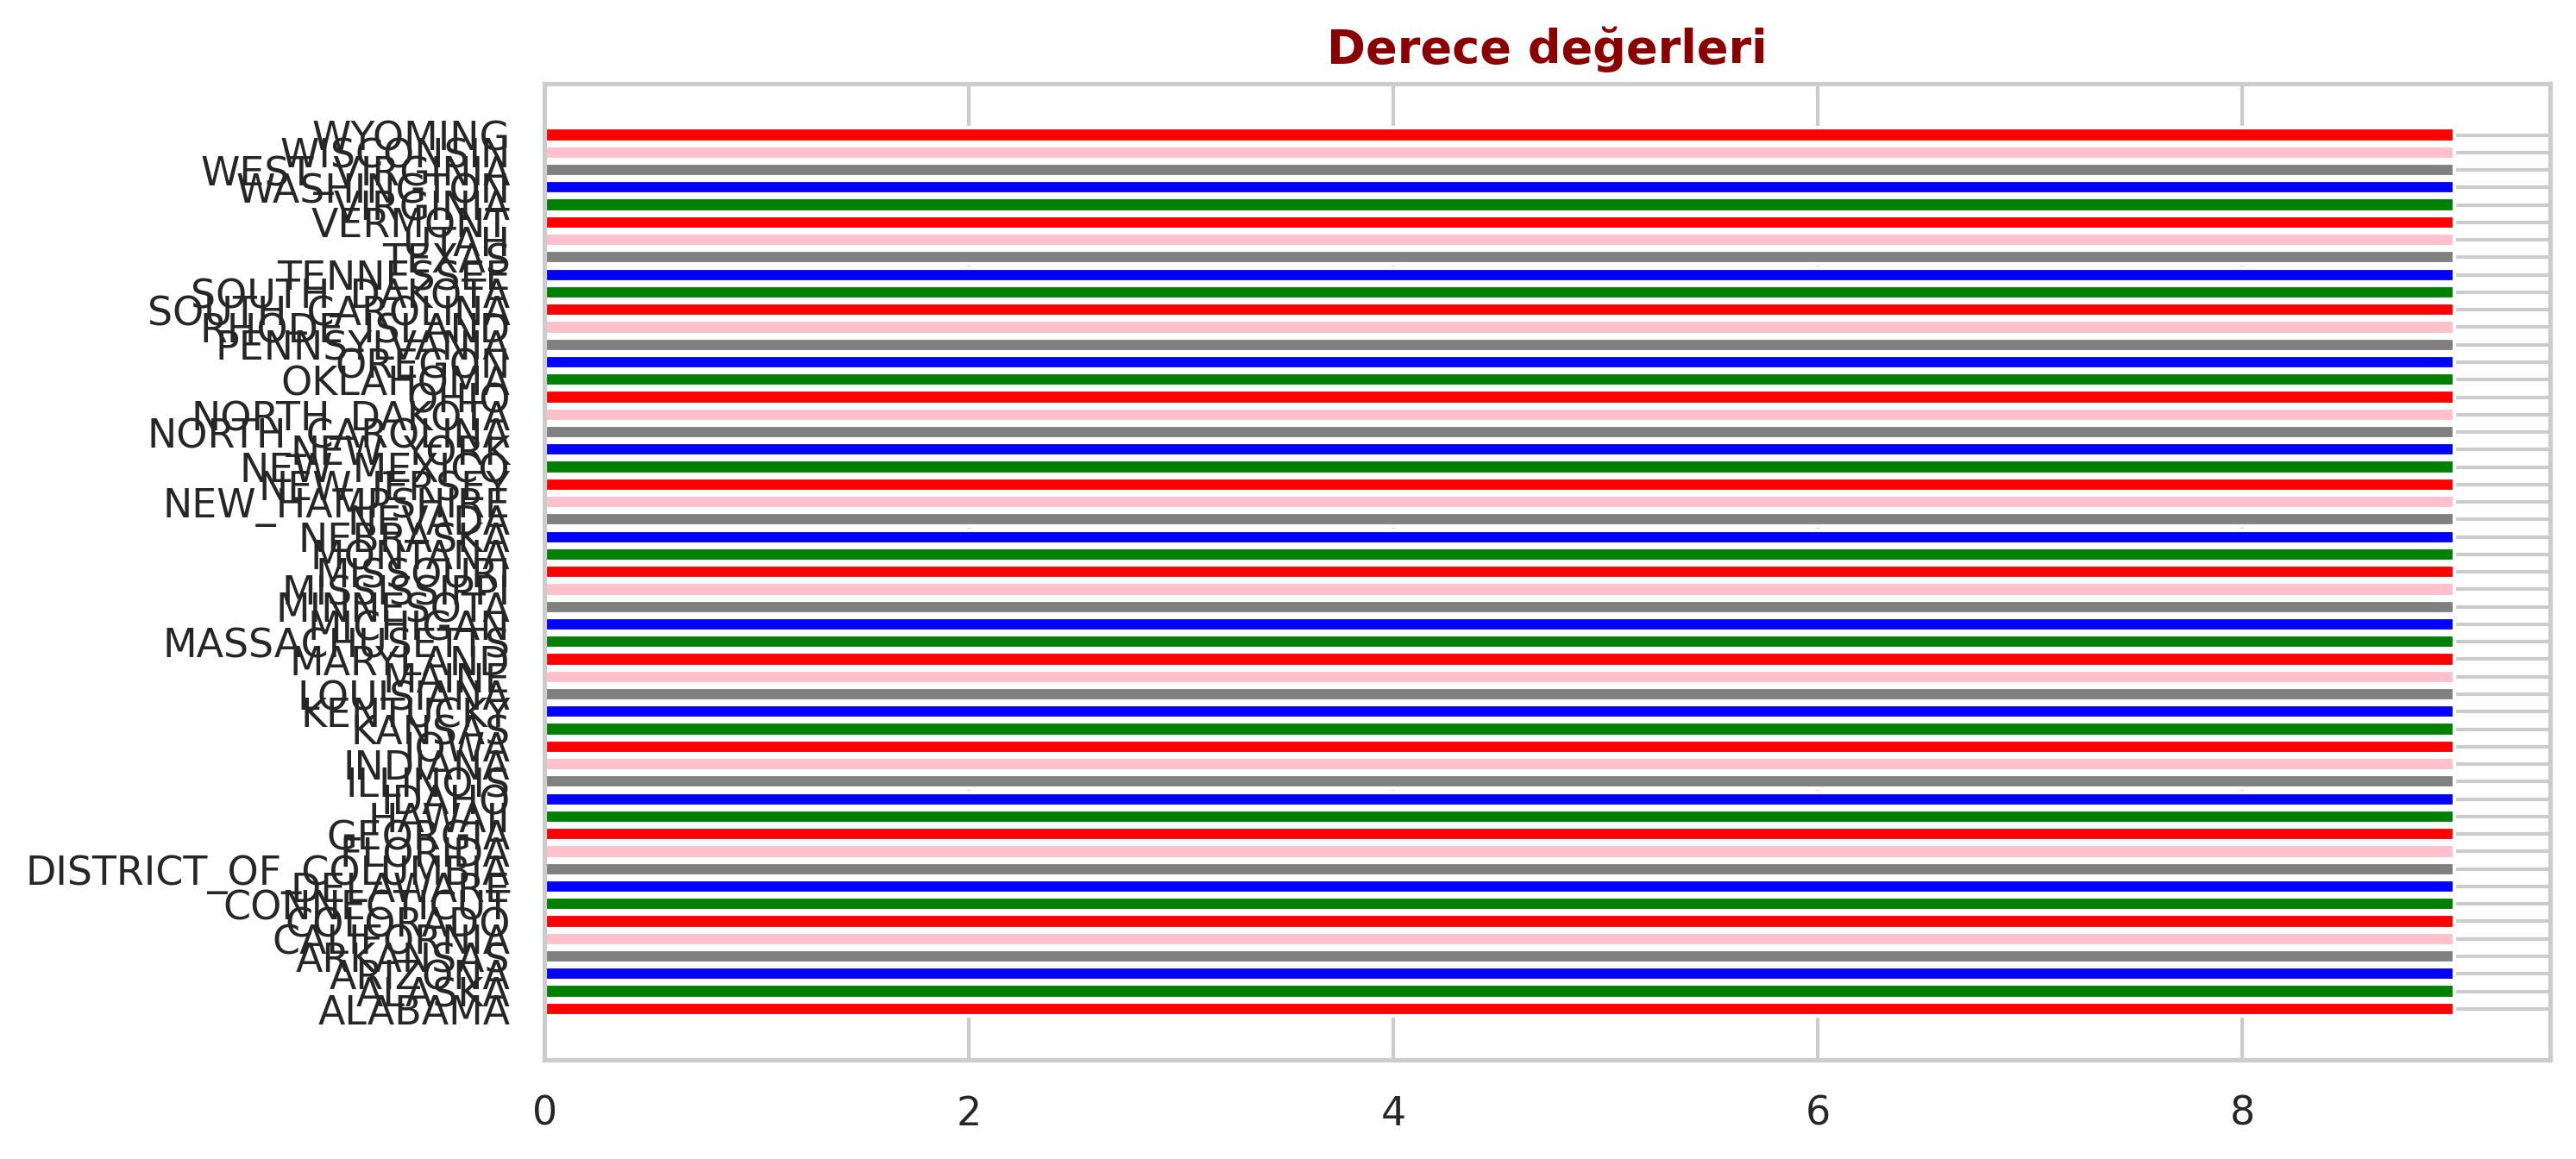

In [120]:
plt.figure(figsize=(10,5), dpi=300)
plt.barh(education_df.groupby("STATE")["STATE"].count().index, 
        education_df.groupby("STATE")["STATE"].count(), 
        color=["red","green","blue","grey","pink"])
plt.title("Derece değerleri", fontdict=baslik_font)

plt.show()

In [0]:
CAedu=education_df[education_df["STATE"]=="CALIFORNIA"].reset_index()

In [0]:
CAedu.drop("index",1,inplace=True)

In [123]:
CAedu.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,2003_CALIFORNIA,CALIFORNIA,2003,6226552.0,59815855.0,5795655.0,33617766.0,20402434.0,59749885.0,29561563.0,17030335.0,2995767.0,7341541.0,114939.0,456941.0,493415.0,500143.0,395194.0,3929869.0,1854518.0,6413867.0,227.0,267.0,206.0,251.0
1,2005_CALIFORNIA,CALIFORNIA,2005,6307022.0,62171797.0,7148863.0,34912166.0,20110768.0,66196072.0,31070450.0,18046385.0,3132465.0,10223657.0,125099.0,458440.0,477828.0,489560.0,423241.0,3848455.0,1953077.0,6437202.0,230.0,269.0,207.0,250.0
2,2007_CALIFORNIA,CALIFORNIA,2007,6288686.0,72516936.0,7200298.0,42333637.0,22983001.0,73225422.0,34685013.0,20655194.0,3467540.0,10058842.0,68002.0,454743.0,467305.0,490054.0,468281.0,3801685.0,2011865.0,6343471.0,230.0,270.0,209.0,251.0
3,2009_CALIFORNIA,CALIFORNIA,2009,6234155.0,73958896.0,9745250.0,40084244.0,24129402.0,74766086.0,35617964.0,21693675.0,3759373.0,8881265.0,71783.0,471058.0,465866.0,472856.0,478503.0,3717166.0,1997064.0,6263438.0,232.0,270.0,210.0,253.0
4,2011_CALIFORNIA,CALIFORNIA,2011,6202604.0,70953331.0,9990221.0,37752712.0,23210398.0,69847705.0,34225248.0,20266047.0,3486160.0,6523770.0,73630.0,488070.0,462082.0,467626.0,494144.0,3742708.0,1977069.0,6287834.0,234.0,273.0,211.0,255.0


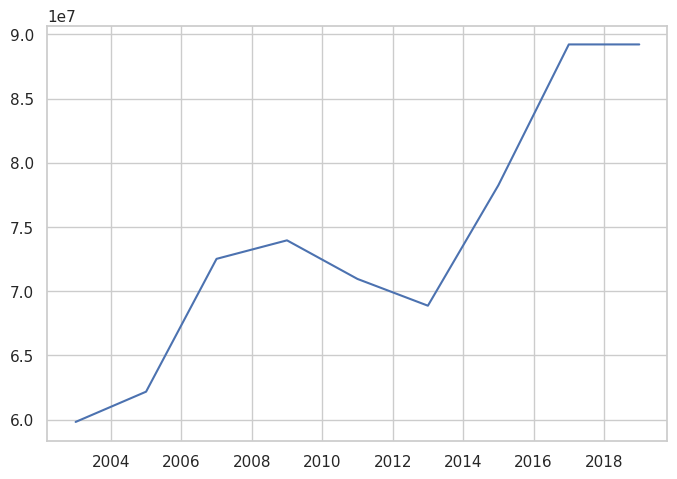

In [124]:
plt.plot(CAedu.YEAR, CAedu.TOTAL_REVENUE)
plt.show()

In [0]:
oos=[CAedu.AVG_MATH_4_SCORE.mean(),CAedu.AVG_MATH_8_SCORE.mean(),CAedu.AVG_READING_4_SCORE.mean(),CAedu.AVG_READING_8_SCORE.mean()]

In [126]:
oos

[231.77777777777777,
 272.55555555555554,
 211.11111111111111,
 255.88888888888889]

In [0]:
columns = ["AVG_MATH_4_SCORE","AVG_MATH_8_SCORE","AVG_READING_4_SCORE","AVG_READING_8_SCORE"]

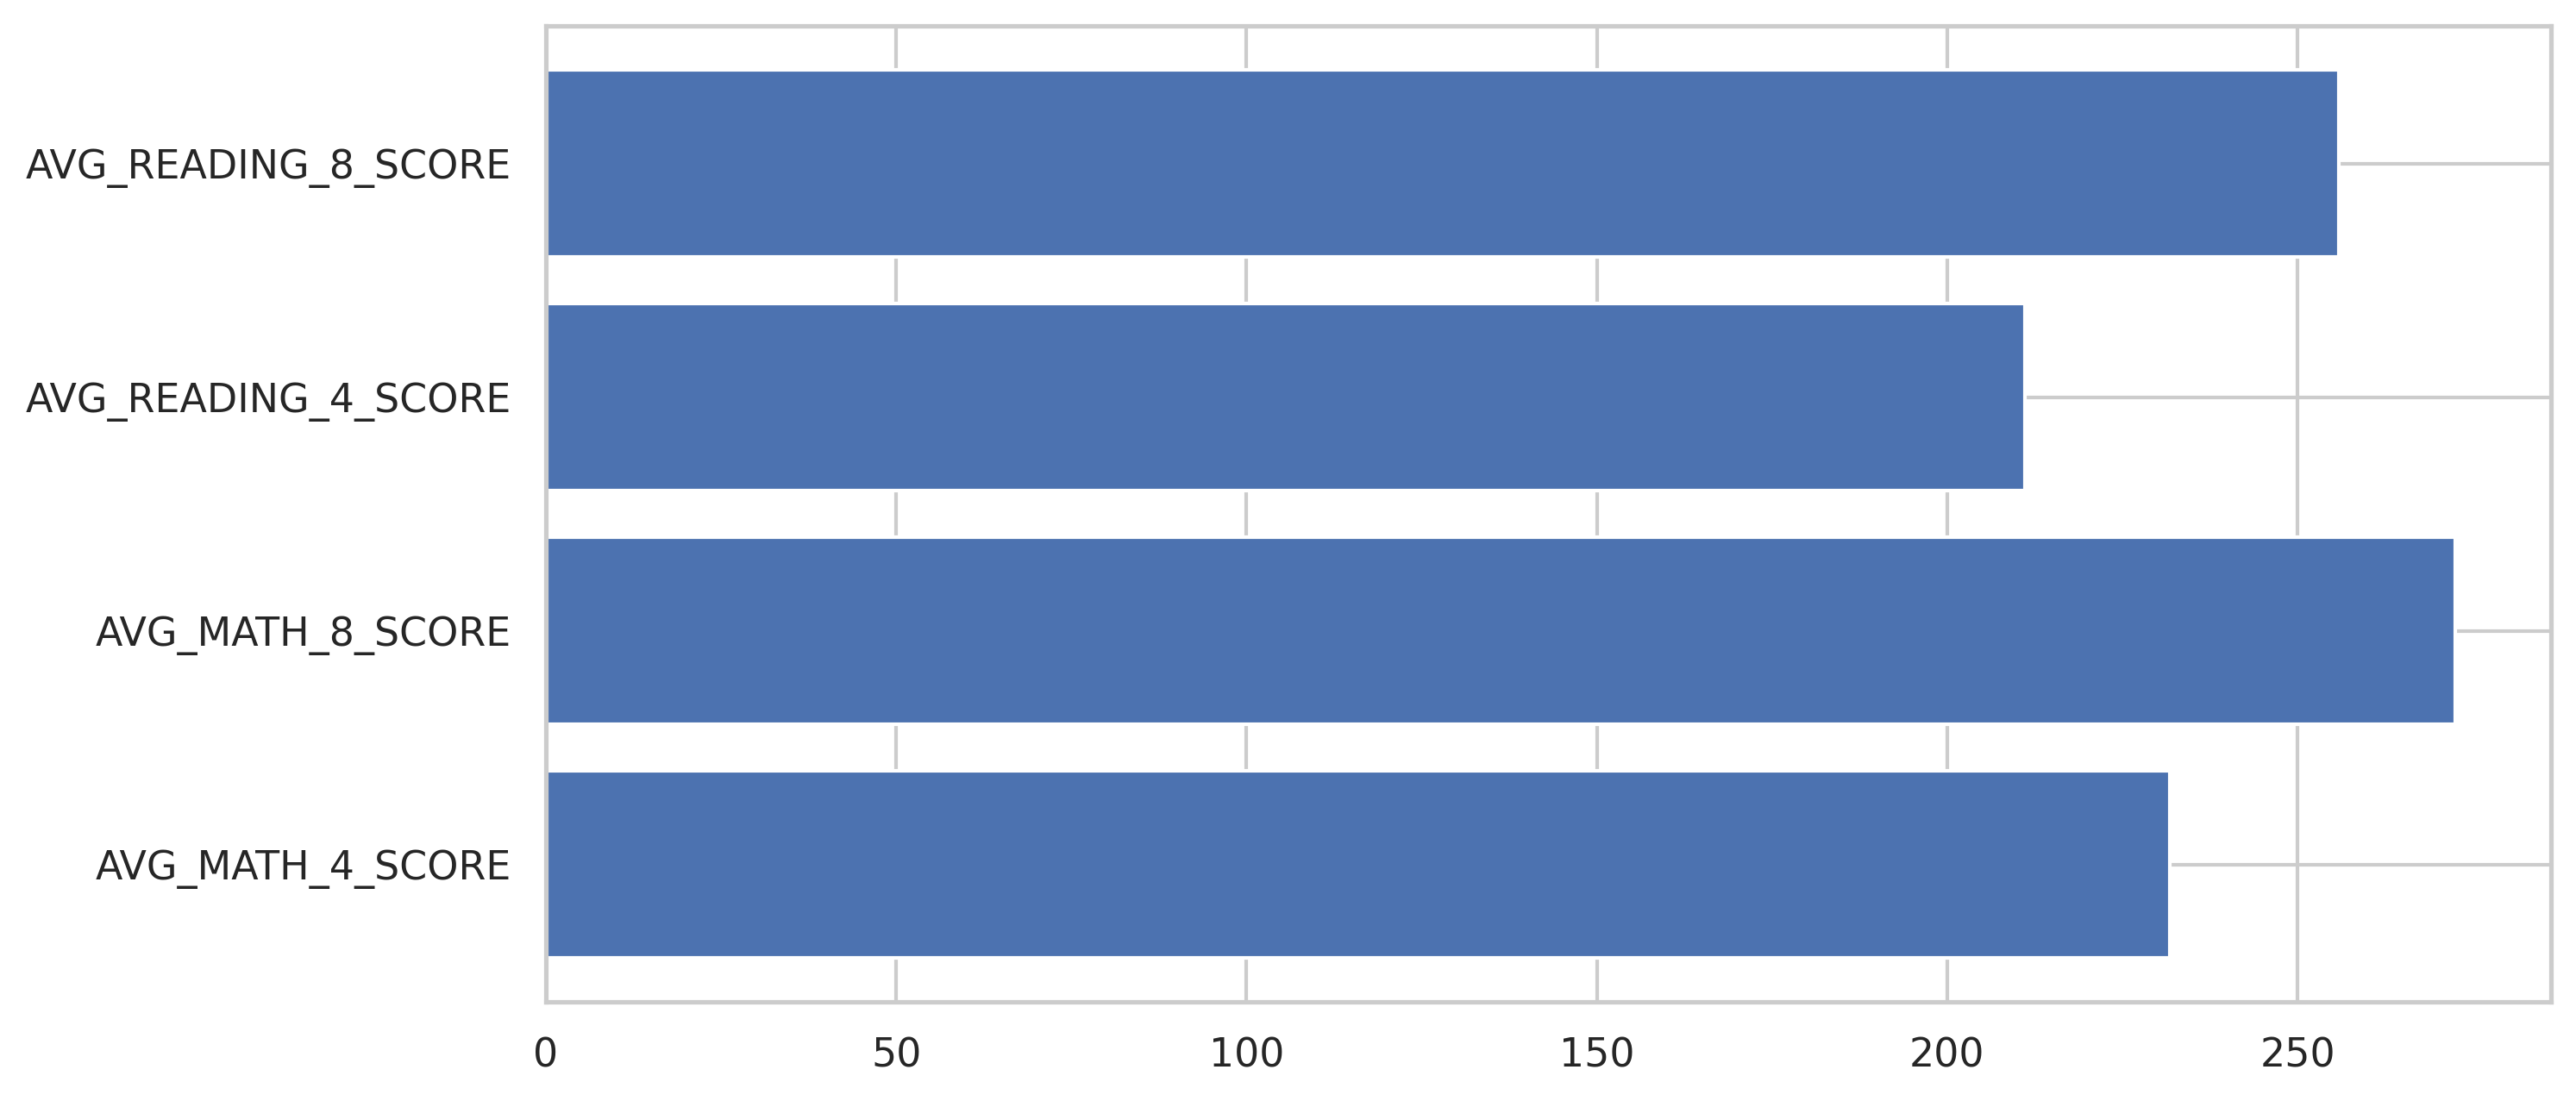

In [128]:
plt.figure(figsize=(10,5), dpi=300)
plt.barh(columns,oos )

plt.show()

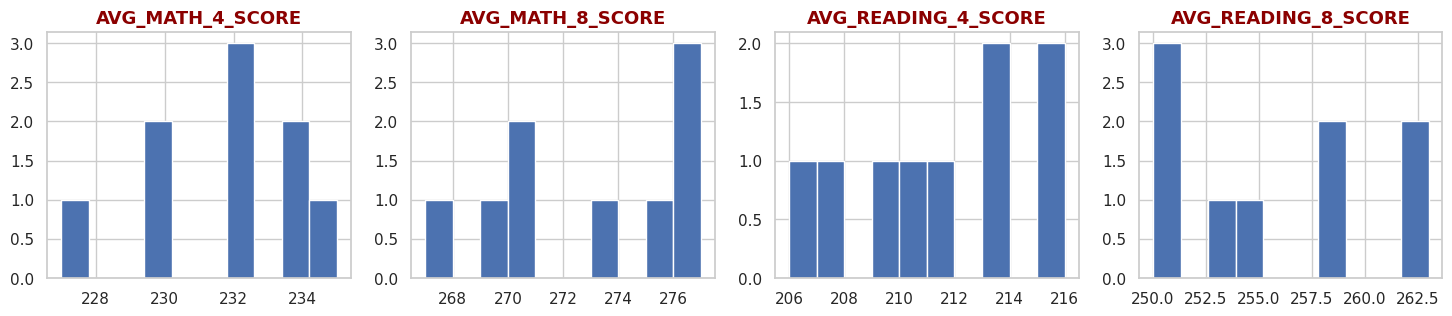

In [129]:
plt.figure(figsize=(18,15))
baslik_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
eksen_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 10 }

degiskenler = ['AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE' , 'AVG_READING_4_SCORE','AVG_READING_8_SCORE']

for i in range(4):
    plt.subplot(4, 4, i+1)
    plt.hist(CAedu[degiskenler[i]])
    plt.title(degiskenler[i], fontdict=baslik_font)
    

  

In [0]:
statesMEAN = education_df.copy()

In [0]:
fill_List = ['ENROLL', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE', 'GRADES_PK_G', 'GRADES_KG_G',
       'GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G', 'GRADES_1_8_G',
       'GRADES_9_12_G', 'GRADES_ALL_G']

for coll in fill_List:
  statesMEAN.loc[:,coll].fillna(statesMEAN.loc[:,coll].mean(), inplace = True)
  

In [0]:
statesMed= education_df.copy()

In [0]:
fill_List = ['ENROLL', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE', 'GRADES_PK_G', 'GRADES_KG_G',
       'GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G', 'GRADES_1_8_G',
       'GRADES_9_12_G', 'GRADES_ALL_G']

for coll in fill_List:
  statesMed.loc[:,coll].fillna(statesMed.loc[:,coll].median(), inplace = True)
  

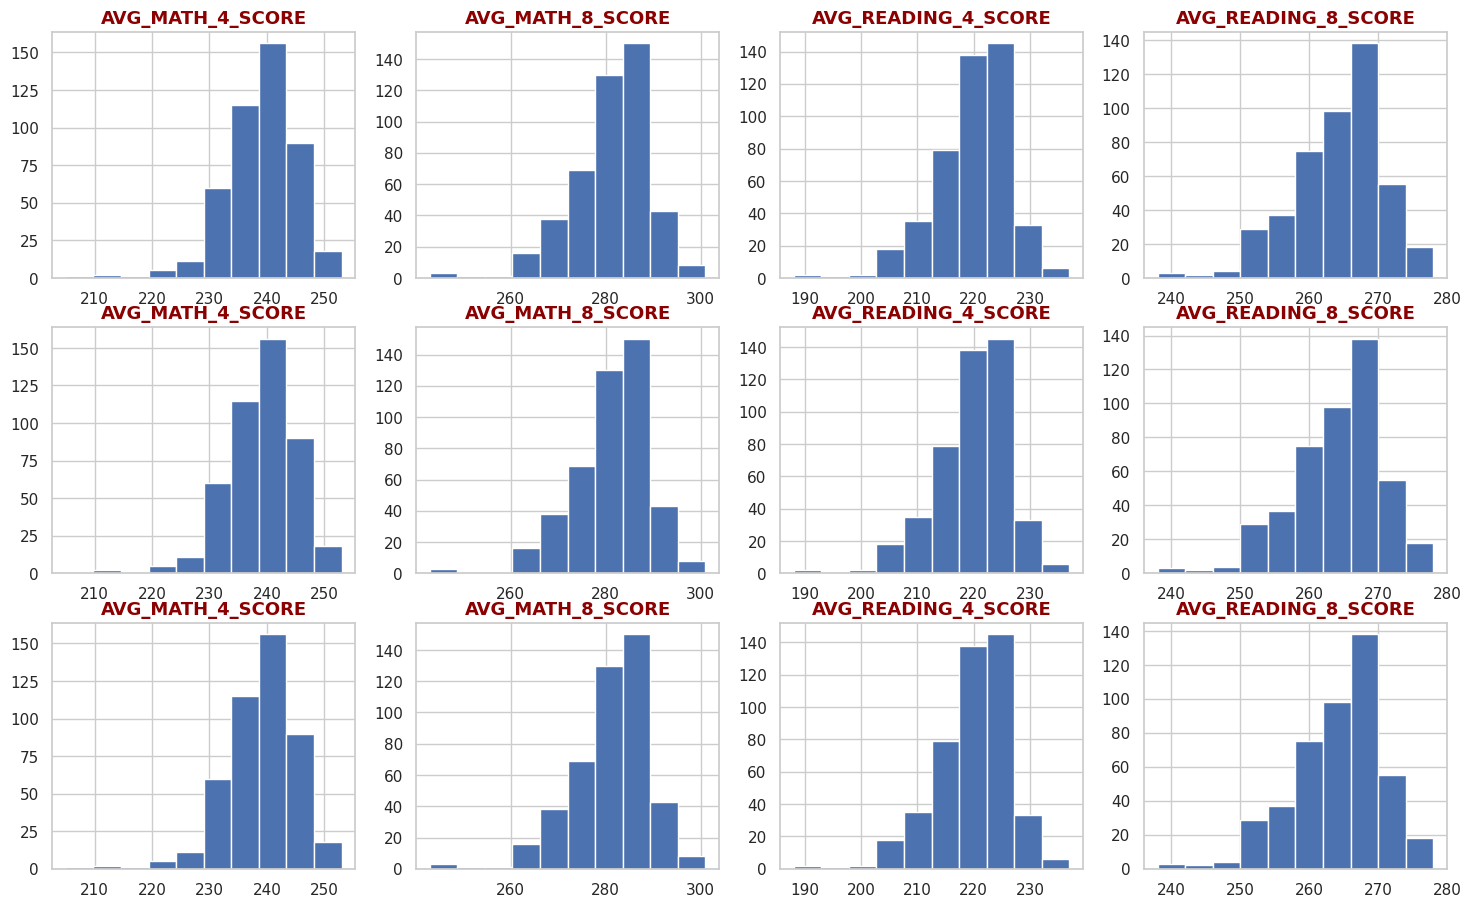

In [134]:
plt.figure(figsize=(18,15))
baslik_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
eksen_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 10 }

degiskenler = ['AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE' , 'AVG_READING_4_SCORE','AVG_READING_8_SCORE']

for i in range(4):
    plt.subplot(4,4,i+1)
    plt.hist(education_df[degiskenler[i]])
    plt.title(degiskenler[i], fontdict=baslik_font)

for i in range(4):
    plt.subplot(4, 4, i+5)
    plt.hist(statesMEAN[degiskenler[i]])
    plt.title(degiskenler[i], fontdict=baslik_font)
    
for i in range(4):
    plt.subplot(4, 4, i+9)
    plt.hist(statesMed[degiskenler[i]])
    plt.title(degiskenler[i], fontdict=baslik_font)